In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt

# to fix - need to try scaling dataß

In [2]:
df = pd.read_csv('data-p4/Flights1_2019_1.csv')[['DEP_DELAY','ARR_DELAY']]
df

,DEP_DELAY,ARR_DELAY
0,-10.0,-25.0
1,-4.0,-37.0
2,-9.0,-17.0
3,-4.0,-23.0
4,-6.0,-12.0
...,...,...
583980,-9.0,-27.0
583981,35.0,17.0
583982,132.0,113.0
583983,32.0,37.0


In [ ]:
df.dropna(inplace=True) # this is just for now to see how dtap runs, will impute properly later
df = df.sample(n=50000, random_state=42).copy() # using a sample for now because whole dataframe is slow / causes crashes
df = df.reset_index(drop=True)

In [4]:
points = np.array(list(zip(df['DEP_DELAY'], df['ARR_DELAY'])))
distances = squareform(pdist(points))

In [5]:
df['dtap'] = distances.sum(axis=1)

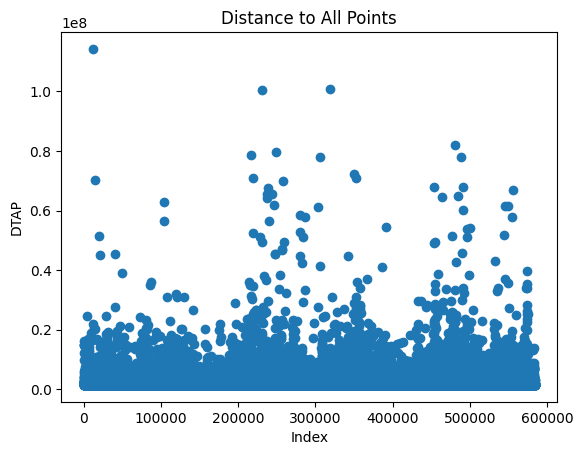

In [6]:
plt.scatter(df.index, df['dtap'])
plt.title("Distance to All Points")
plt.xlabel("Index")
plt.ylabel("DTAP")
plt.show()

In [25]:
df['dtap'].nlargest(10).index

Index([28535, 44512, 11253, 25679, 33072, 20908, 25927, 24988, 3222, 21658], dtype='int64')

In [9]:
np.fill_diagonal(distances, np.inf)
df['dtnn'] = np.min(distances, axis=1)

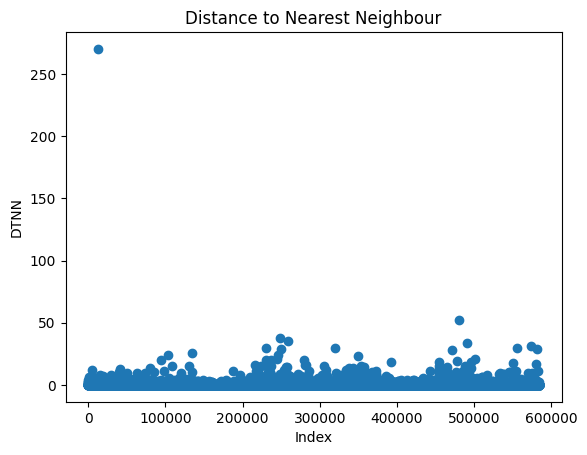

In [10]:
plt.scatter(df.index, df['dtnn'])
plt.title("Distance to Nearest Neighbour")
plt.xlabel("Index")
plt.ylabel("DTNN")
plt.show()

In [24]:
df['dtnn'].nlargest(10).index

Index([28535, 25679, 30088, 24850, 32375, 29090, 11253, 44512, 16827, 33072], dtype='int64')

In [26]:
df.iloc[[28535]]

,DEP_DELAY,ARR_DELAY,dtap,dtnn
28535,1637.0,1609.0,1.142476e+08,270.351623


In [ ]:
# k = 5 
# df['dtknn'] = np.sort(distances, axis=1)[:, 1:k+1].sum(axis=1)
